In [19]:
# Importações
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
pp = pprint.PrettyPrinter(width=1000, compact=True)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
import time

In [20]:
#Leitura dos dados
colunas=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/features.txt",delim_whitespace=True,header=None)
colunas=colunas[0].astype(str)+"-"+colunas[1]
colunas=colunas.values.tolist()
x_treino_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/X_train.txt",names=colunas,delim_whitespace=True)
x_teste_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/X_test.txt",names=colunas,delim_whitespace=True)
y_treino_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/y_train.txt",names=['Label'],delim_whitespace=True)
y_teste_df=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/y_test.txt",names=['Label'],delim_whitespace=True)

In [21]:
#Standarlizando os dados
def dataframe_stand(x):
  return (x-x.mean(axis=0))/x.std(axis=0)

x_treino_df_stand=dataframe_stand(x_treino_df).copy()
x_teste_df_stand=dataframe_stand(x_teste_df).copy()


In [22]:
def distance_func(x,y):
    dist=np.sqrt(np.sum((x-y)**2,axis=1))
    return dist

numero_classes=6
numero_maximo_k=100

# numero_amostras=40
numero_amostras=len(x_teste_df)

#Gerando o dataframe com o relatório
colunas=[]
for k in range(1,numero_maximo_k+1) :
     colum_name='k='+str(k)
     colunas.append(colum_name)   
relatorio=pd.DataFrame(columns=colunas)


start=time.time()
for t in range(0,numero_amostras):
    #Calcula a distancia e ordena do menor pro maior
    dist=distance_func(x_treino_df_stand.values,x_teste_df_stand.values[t,:])
    dist_df=pd.DataFrame(dist,columns=['Dist'])
    dist_df['Label']=y_treino_df['Label']
    dist_df=dist_df.sort_values(by=['Dist'])
#     print(dist_df.head(numero_maximo_k))
    dist_df_lista=dist_df.head(numero_maximo_k)['Label'].to_list()
    if (t%(numero_amostras//25)==0):
        print("{} %".format((t/numero_amostras*100)))
        print("Tempo execução:{}".format(time.time()-start))
    #Para cada k
    print("Amostra:{}".format(t+1))
    for k in range(1,numero_maximo_k+1):
#         print("Numero de vizinhos:{}".format(k))
        votos_classe=np.zeros(numero_classes)
        #Rodando dentro do subvetor
        for i in range(1,k+1):
#             print(i)
            votos_classe[dist_df_lista[i-1]-1]+=1
#         print(votos_classe)
        relatorio.loc[t,colunas[k-1]]=np.argmax(votos_classe)+1
# print(relatorio)

0.0 %
Tempo execução:0.09494495391845703
Amostra:1
Amostra:2
Amostra:3
Amostra:4
Amostra:5
Amostra:6
Amostra:7
Amostra:8
Amostra:9
Amostra:10
Amostra:11
Amostra:12
Amostra:13
Amostra:14
Amostra:15
Amostra:16
Amostra:17
Amostra:18
Amostra:19
Amostra:20
Amostra:21
Amostra:22
Amostra:23
Amostra:24
Amostra:25
Amostra:26
Amostra:27
Amostra:28
Amostra:29
Amostra:30
Amostra:31
Amostra:32
Amostra:33
Amostra:34
Amostra:35
Amostra:36
Amostra:37
Amostra:38
Amostra:39
Amostra:40
Amostra:41
Amostra:42
Amostra:43
Amostra:44
Amostra:45
Amostra:46
Amostra:47
Amostra:48
Amostra:49
Amostra:50
Amostra:51
Amostra:52
Amostra:53
Amostra:54
Amostra:55
Amostra:56
Amostra:57
Amostra:58
Amostra:59
Amostra:60
Amostra:61
Amostra:62
Amostra:63
Amostra:64
Amostra:65
Amostra:66
Amostra:67
Amostra:68
Amostra:69
Amostra:70
Amostra:71
Amostra:72
Amostra:73
Amostra:74
Amostra:75
Amostra:76
Amostra:77
Amostra:78
Amostra:79
Amostra:80
Amostra:81
Amostra:82
Amostra:83
Amostra:84
Amostra:85
Amostra:86
Amostra:87
Amostra:88


Amostra:668
Amostra:669
Amostra:670
Amostra:671
Amostra:672
Amostra:673
Amostra:674
Amostra:675
Amostra:676
Amostra:677
Amostra:678
Amostra:679
Amostra:680
Amostra:681
Amostra:682
Amostra:683
Amostra:684
Amostra:685
Amostra:686
Amostra:687
Amostra:688
Amostra:689
Amostra:690
Amostra:691
Amostra:692
Amostra:693
Amostra:694
Amostra:695
Amostra:696
Amostra:697
Amostra:698
Amostra:699
Amostra:700
Amostra:701
Amostra:702
23.820834747200543 %
Tempo execução:68.43294763565063
Amostra:703
Amostra:704
Amostra:705
Amostra:706
Amostra:707
Amostra:708
Amostra:709
Amostra:710
Amostra:711
Amostra:712
Amostra:713
Amostra:714
Amostra:715
Amostra:716
Amostra:717
Amostra:718
Amostra:719
Amostra:720
Amostra:721
Amostra:722
Amostra:723
Amostra:724
Amostra:725
Amostra:726
Amostra:727
Amostra:728
Amostra:729
Amostra:730
Amostra:731
Amostra:732
Amostra:733
Amostra:734
Amostra:735
Amostra:736
Amostra:737
Amostra:738
Amostra:739
Amostra:740
Amostra:741
Amostra:742
Amostra:743
Amostra:744
Amostra:745
Amostra:74

Amostra:1298
Amostra:1299
Amostra:1300
Amostra:1301
Amostra:1302
Amostra:1303
Amostra:1304
Amostra:1305
Amostra:1306
Amostra:1307
Amostra:1308
Amostra:1309
Amostra:1310
Amostra:1311
Amostra:1312
Amostra:1313
Amostra:1314
Amostra:1315
Amostra:1316
Amostra:1317
Amostra:1318
Amostra:1319
Amostra:1320
Amostra:1321
Amostra:1322
Amostra:1323
Amostra:1324
Amostra:1325
Amostra:1326
Amostra:1327
Amostra:1328
Amostra:1329
Amostra:1330
Amostra:1331
Amostra:1332
Amostra:1333
Amostra:1334
Amostra:1335
Amostra:1336
Amostra:1337
Amostra:1338
Amostra:1339
Amostra:1340
Amostra:1341
Amostra:1342
Amostra:1343
Amostra:1344
Amostra:1345
Amostra:1346
Amostra:1347
Amostra:1348
Amostra:1349
Amostra:1350
Amostra:1351
Amostra:1352
Amostra:1353
Amostra:1354
Amostra:1355
Amostra:1356
Amostra:1357
Amostra:1358
Amostra:1359
Amostra:1360
Amostra:1361
Amostra:1362
Amostra:1363
Amostra:1364
Amostra:1365
Amostra:1366
Amostra:1367
Amostra:1368
Amostra:1369
Amostra:1370
Amostra:1371
Amostra:1372
Amostra:1373
Amostra:1374

Amostra:1908
Amostra:1909
Amostra:1910
Amostra:1911
Amostra:1912
Amostra:1913
Amostra:1914
Amostra:1915
Amostra:1916
Amostra:1917
Amostra:1918
Amostra:1919
Amostra:1920
Amostra:1921
Amostra:1922
Amostra:1923
Amostra:1924
Amostra:1925
Amostra:1926
Amostra:1927
Amostra:1928
Amostra:1929
Amostra:1930
Amostra:1931
Amostra:1932
Amostra:1933
Amostra:1934
Amostra:1935
Amostra:1936
Amostra:1937
Amostra:1938
Amostra:1939
Amostra:1940
Amostra:1941
Amostra:1942
Amostra:1943
Amostra:1944
Amostra:1945
Amostra:1946
Amostra:1947
Amostra:1948
Amostra:1949
Amostra:1950
Amostra:1951
Amostra:1952
Amostra:1953
Amostra:1954
Amostra:1955
Amostra:1956
Amostra:1957
Amostra:1958
Amostra:1959
Amostra:1960
Amostra:1961
Amostra:1962
Amostra:1963
Amostra:1964
Amostra:1965
Amostra:1966
Amostra:1967
Amostra:1968
Amostra:1969
Amostra:1970
Amostra:1971
Amostra:1972
Amostra:1973
Amostra:1974
Amostra:1975
Amostra:1976
Amostra:1977
Amostra:1978
Amostra:1979
Amostra:1980
Amostra:1981
Amostra:1982
Amostra:1983
Amostra:1984

Amostra:2517
Amostra:2518
Amostra:2519
Amostra:2520
Amostra:2521
Amostra:2522
Amostra:2523
Amostra:2524
Amostra:2525
Amostra:2526
Amostra:2527
Amostra:2528
Amostra:2529
Amostra:2530
Amostra:2531
Amostra:2532
Amostra:2533
Amostra:2534
Amostra:2535
Amostra:2536
Amostra:2537
Amostra:2538
Amostra:2539
Amostra:2540
Amostra:2541
Amostra:2542
Amostra:2543
Amostra:2544
Amostra:2545
Amostra:2546
Amostra:2547
Amostra:2548
Amostra:2549
Amostra:2550
Amostra:2551
Amostra:2552
Amostra:2553
Amostra:2554
Amostra:2555
Amostra:2556
Amostra:2557
Amostra:2558
Amostra:2559
Amostra:2560
Amostra:2561
Amostra:2562
Amostra:2563
Amostra:2564
Amostra:2565
Amostra:2566
Amostra:2567
Amostra:2568
Amostra:2569
Amostra:2570
Amostra:2571
Amostra:2572
Amostra:2573
Amostra:2574
87.34306073973532 %
Tempo execução:259.56995606422424
Amostra:2575
Amostra:2576
Amostra:2577
Amostra:2578
Amostra:2579
Amostra:2580
Amostra:2581
Amostra:2582
Amostra:2583
Amostra:2584
Amostra:2585
Amostra:2586
Amostra:2587
Amostra:2588
Amostra:25

In [36]:
# relatorio.to_csv(r'C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/har_smartphone/roger.csv')
# relatorio

In [23]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(y_teste_df.values, relatorio['k=50'].values))
print(metrics.classification_report(y_teste_df.values, relatorio['k=50'].values, digits=3))
print(metrics.f1_score(y_teste_df.values, relatorio['k=50'].values, average='micro'))

[[487   1   8   0   0   0]
 [ 37 432   2   0   0   0]
 [ 52  48 320   0   0   0]
 [  0   2   0 372 117   0]
 [  0   0   0  20 512   0]
 [  0   0   0   9  18 510]]
              precision    recall  f1-score   support

           1      0.845     0.982     0.909       496
           2      0.894     0.917     0.906       471
           3      0.970     0.762     0.853       420
           4      0.928     0.758     0.834       491
           5      0.791     0.962     0.869       532
           6      1.000     0.950     0.974       537

    accuracy                          0.893      2947
   macro avg      0.905     0.888     0.891      2947
weighted avg      0.903     0.893     0.893      2947

0.8934509670851712


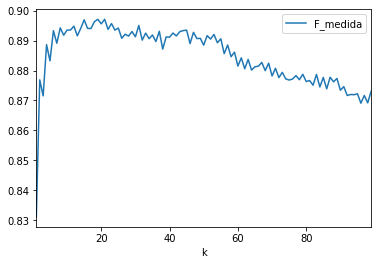

     k  F_medida
22  23  0.895677
17  18  0.896293
14  15  0.896925
18  19  0.897102
20  21  0.897115
[[483   2  11   0   0   0]
 [ 41 429   1   0   0   0]
 [ 46  52 322   0   0   0]
 [  0   1   0 389  98   3]
 [  0   0   0  19 513   0]
 [  0   0   0  13  12 512]]
              precision    recall  f1-score   support

           1      0.847     0.974     0.906       496
           2      0.886     0.911     0.898       471
           3      0.964     0.767     0.854       420
           4      0.924     0.792     0.853       491
           5      0.823     0.964     0.888       532
           6      0.994     0.953     0.973       537

    accuracy                          0.899      2947
   macro avg      0.907     0.894     0.896      2947
weighted avg      0.905     0.899     0.898      2947



In [27]:
f_medida_lista=[]
for c in range(1,len(colunas)):
    f1=metrics.f1_score(y_teste_df.values, relatorio[colunas[c]].values, average='macro')
    f_medida_lista.append([c, f1])

#Gráfico 1
grafico_f_medida=pd.DataFrame(f_medida_lista,columns=['k','F_medida'])
grafico_f_medida.plot(x='k',y='F_medida')
plt.show()
f_medida_df=pd.DataFrame(f_medida_lista,columns=['k','F_medida'])
print(f_medida_df.sort_values(by='F_medida').tail())
print(metrics.confusion_matrix(y_teste_df.values, relatorio['k=21'].values))
print(metrics.classification_report(y_teste_df.values, relatorio['k=21'].values, digits=3))

In [14]:
from sklearn import metrics
print(np.round(metrics.f1_score([1,1,2,2,2,2,3,3,3,3], [1,3,1,2,2,3,2,3,3,3], average='macro'),4))
print(metrics.classification_report([1,1,2,2,2,2,3,3,3,3], [1,3,1,2,2,3,2,3,3,3], digits=5))
print(2*(0.58889*0.58333)/(0.58889+0.58333))

0.5794
              precision    recall  f1-score   support

           1    0.50000   0.50000   0.50000         2
           2    0.66667   0.50000   0.57143         4
           3    0.60000   0.75000   0.66667         4

    accuracy                        0.60000        10
   macro avg    0.58889   0.58333   0.57937        10
weighted avg    0.60667   0.60000   0.59524        10

0.5860968140792684


In [ ]:
classe=1
max_it=1000
pp=0.00001
passo=0.01
w_inicial=np.zeros([562,6])
w_final=np.empty([562,6])

for classe in range(1,7):
# #     w=np.ones(562)
#     w=np.empty(562)
#     w=w/1000
    y_treino_l=labelizer_func(y_treino_df.values[:,0],classe)

    #Gráfico historgrama após labelizacao
    titulo="Classe:{}".format(classe)
    pd.DataFrame(y_treino_l,columns=[titulo]).hist()

    #treino do modelo
    # grafico_custo=[]
    grafico_custo,w_final[:,classe-1],custo_final,precisao,i,mensagem=logistic_train_func(w_inicial[:,classe-1],x_treino_df_stand.values,y_treino_l,max_it,pp,passo)

    #grafico do custo
    grafico_custo=pd.DataFrame(grafico_custo,columns=['Custo'])
    plt.title(titulo)
    grafico_custo.plot()
#     plt.show()
# print(grafico_custo)
plt.show()

In [ ]:
w_final

In [ ]:
yh_teste=yh_func(x_teste_df_stand.values,w_final)
# print(x_treino_df_stand.shape)
# print(w_final.shape)
# print(yh_treino.shape)
# teste=pd.DataFrame(yh_treino,columns=['Classe1'])
# teste['Real']=y_treino_df
# teste[teste['Real']==classe]
yh_teste2=np.zeros(yh_teste.shape[0])
for i in range(0,yh_teste.shape[0]):
    yh_teste2[i]=np.where(yh_teste[i,:] == np.amax(yh_teste[i,:]))[0]+1
print(yh_teste2)
print(y_teste_df.values[:,0])
confusion_matrix(y_teste_df.values[:,0], yh_teste2, labels=[1,2,3,4,5,6])
confirmacao=pd.DataFrame(yh_teste,columns=[1,2,3,4,5,6])
confirmacao['Estimado']=yh_teste2
confirmacao['Verdadeiro']=y_teste_df['Label']

# print(confirmacao)

In [ ]:
labels = [1,2,3,4,5,6]
cm = confusion_matrix(y_teste_df.values[:,0], yh_teste2, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(sum(sum(cm)))

In [ ]:
def division_zero(a, b):
    if b:
        x=a/b
    if b==0:
        x=0
    return x

lis_treshold=np.arange(0,1+step,step)
f_medida_lista=[]
for t in lis_treshold:
    yh_teste_t=threshold_func(yh_teste,t)
    tn, fp, fn, tp=confusion_matrix(y_teste, yh_teste_t).ravel()
    recall=division_zero(tp,(tp+fn))
    precisao=division_zero(tp,fp+tp)
    a=recall*precisao
    b=recall+precisao
    f_medida=division_zero(a,b)
    f_medida_lista.append([t, f_medida])

#Gráfico 1
grafico_f_medida=pd.DataFrame(f_medida_lista,columns=['t','F_medida'])
grafico_f_medida.plot(x='t',y='F_medida')
plt.show()

#Gráfico 2
x=np.array(f_medida_lista)
x=x[:,0].copy()
y=np.array(f_medida_lista)
y=y[:,1].copy()
plt.plot(x,y,'.--')
plt.show()

In [ ]:


import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_treino, y_treino)
yh_treino=LR.predict(x_treino)
yh_teste=LR.predict(x_teste)
print("treino")
print("tn, fp, fn, tp")
print(confusion_matrix(y_treino, yh_treino).ravel()/len(y_treino)*100)
print("teste")
print("tn, fp, fn, tp")
print(confusion_matrix(y_teste,yh_teste).ravel()/len(y_teste)*100)


def custo_func(y,yh):
#     custo=-np.sum(y_treino*np.log(yh_treino)+(1-y_treino)*np.log(1-yh_treino))/len(y)
#     return custo
    eps=1e-15
    custo=-
    yh = np.clip(yh, eps, 1 - eps)
    for i in range(0,len(y)):
        if y[i] == 1:
            custo+= -np.log(yh[i])
        else:
            custo+= -np.log(1 - yh[i])
    custo=custo/len(y)
    return custo


# teste
# import numpy as np
# from sklearn.model_selection import KFold

# X = np.array(["a", "b", "c", "d","e","f","g","h"])
# kf = KFold(n_splits=5)
# for train_index, test_index in kf.split(X):
#     print(train_index)
#     print(X[train_index])
#     print(test_index)
#     print(X[test_index])

# h=np.array([0,1,2])
# print(X[h])

#teste
# print(log_loss([1,0],[1,1]))
# print(1*np.log(1))

# algoritmo para logloss
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  print(p)
  if true_label == 1:
    return -np.log(p)
  else:
    return -np.log(1 - p)

#códigos legais
# print(x_treino.shape)
# print(w.shape[0])
# print(w.shape)
# print(len(w))



y_true = [0, 0, 1, 1]
y_pred = [0.0,0.9,0.1,0.7]
teste=0
for i in range(0,len(y_true)):
    teste+=logloss(y_true[i],y_pred[i])

teste=teste/len(y_true)
print(teste)
print(log_loss(y_true,y_pred))
np.log(0.000000000000000000000000000000000000001)

In [ ]:
# ar1=np.array([1,2,2,3])
# ar2=np.array([[1,0,0,0],[0,1,1,0],[0,0,0,1]])
# print(log_loss(ar1,ar2))

actual_labels = [1,2,3]

log_loss(actual_labels,  [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 6, 6, 2])
print(lb.classes_)
print(lb.transform([1, 6]))

In [ ]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])
result = np.where(arr == np.amax(arr))
print(result[0])

In [ ]:
confusion_matrix([1,1,2,2,3,3],[1,2,2,2,5,3], labels=[1,2,3])